# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [5]:
print(x_train.shape)
print(x_test.shape)

(25000, 1000)
(25000, 1000)


And we'll also one-hot encode the output.

In [6]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [23]:
# TODO: Build the model architecture
model = Sequential()

model.add(Dense(128, input_dim=1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

# TODO: Compile the model using a loss function and an optimizer.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               128128    
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 258       
_________________________________________________________________
activation_13 (Activation)   (None, 2)                 0         
Total params: 128,386
Trainable params: 128,386
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [9]:
print(x_train.shape, x_test.shape)

(25000, 1000) (25000, 1000)


In [10]:
x_val = x_test[:5000, :]
y_val = y_test[:5000, :]

x_test_new = x_test[5000:, :]
y_test_new = y_test[5000:, :]

print(x_val.shape, y_val.shape)
print(x_test_new.shape, y_test_new.shape)

(5000, 1000) (5000, 2)
(20000, 1000) (20000, 2)


In [25]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=10)

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 1s - loss: 0.4317 - acc: 0.7992 - val_loss: 0.3313 - val_acc: 0.8628
Epoch 2/10
25000/25000 [==============================] - 1s - loss: 0.3235 - acc: 0.8622 - val_loss: 0.3117 - val_acc: 0.8678
Epoch 3/10
25000/25000 [==============================] - 1s - loss: 0.2967 - acc: 0.8737 - val_loss: 0.3092 - val_acc: 0.8642
Epoch 4/10
25000/25000 [==============================] - 1s - loss: 0.2703 - acc: 0.8869 - val_loss: 0.3103 - val_acc: 0.8666
Epoch 5/10
25000/25000 [==============================] - 1s - loss: 0.2521 - acc: 0.8961 - val_loss: 0.3110 - val_acc: 0.8670
Epoch 6/10
25000/25000 [==============================] - 1s - loss: 0.2242 - acc: 0.9120 - val_loss: 0.3162 - val_acc: 0.8638
Epoch 7/10
25000/25000 [==============================] - 1s - loss: 0.2050 - acc: 0.9206 - val_loss: 0.3185 - val_acc: 0.8678
Epoch 8/10
25000/25000 [==============================] - 1s -

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.85584


In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
pca = PCA(n_components=2)

pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
tsne = TSNE(verbose=2)

tsne.fit(x_train)
x_train_tsne = tsne.transform(x_train)
x_test_tsne = tsne.transform(x_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25000 samples in 2.235s...


In [17]:
y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

print(y_train_true.shape)
print(y_test_true.shape)

(25000,)
(25000,)


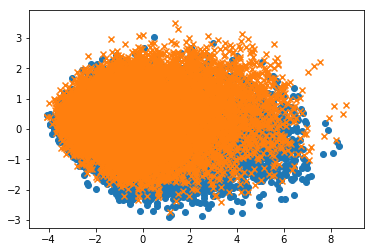

In [18]:
plt.scatter(x_train_pca[y_train_true == 0][:, 0], x_train_pca[y_train_true == 0][:, 1], marker='o')
plt.scatter(x_train_pca[y_train_true == 1][:, 0], x_train_pca[y_train_true == 1][:, 1], marker='x')